In [1]:
%pip install -q matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import numpy as np

AttributeError: module 'numpy' has no attribute 'axis'

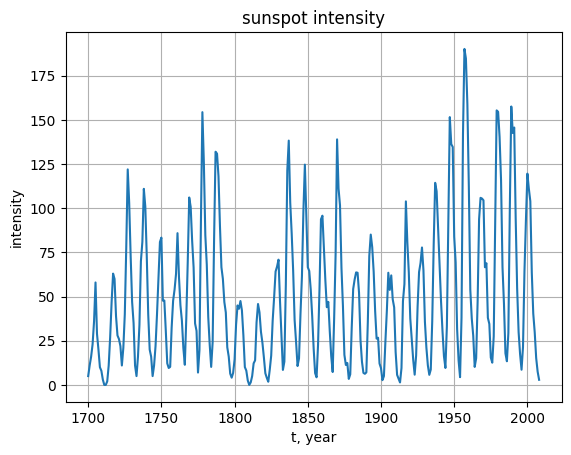

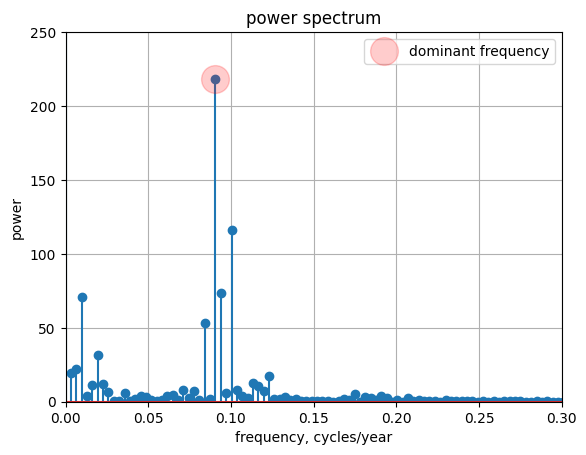

In [3]:


sunspot = np.loadtxt('./data/sunspots.csv', delimiter=',', skiprows=1)
year = sunspot[:, 0]
inten = sunspot[:, 1]

ak = np.fft.ifft(inten)
power = abs(ak)**2
amplitude_dB = 20*np.log10(abs(ak))
dt = 1 # 1 year
nu = len(year)
freq = np.fft.fftfreq(nu, dt)  # cycles/year
tau = year[-1] - year[0]

plt.figure()
plt.plot(year, inten);
plt.xlabel('t, year');
plt.ylabel('intensity')
plt.title('sunspot intensity')
plt.grid()


plt.figure()
plt.title('power spectrum')
plt.stem(freq[:nu//2], power[:nu//2])
plt.xlabel('frequency, cycles/year')
plt.ylabel('power')
plt.axis([0, 0.3, 0, 250])
plt.grid()

# find dominant period, ignoring values near a0
k_max = 10 + np.argmax(amplitude_dB[10:nu//2])  # find max, skipping first 10 harmonics
plt.plot(freq[k_max], power[k_max], 'ro', markersize=20, alpha=0.2, label='dominant frequency')
plt.legend()
np.axis([0.15, 0.5, 0, 25])

print('dominant frequency', freq[k_max], 'cycles/year')
print('dominant period', 1/freq[k_max], 'years')

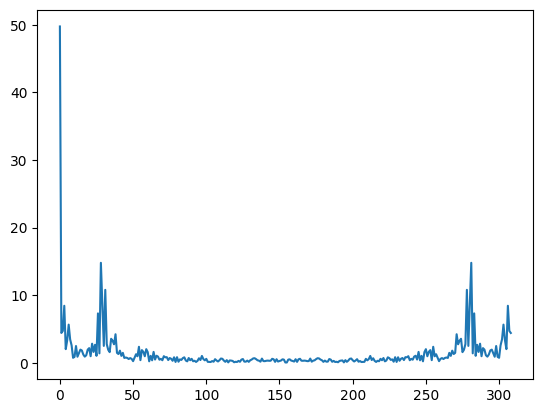

In [ ]:
plt.plot(abs(ak[:]))

In [ ]:
dt = np.mean(np.diff(year))
nu

309

In [ ]:
f_start = np.argwhere(freq > 0.3)[0, 0]
f_end = np.argwhere(freq > 0.4)[0, 0] + 1
f_start, f_end

(np.int64(93), np.int64(125))

In [ ]:
f_range = freq[f_start:f_end]

In [ ]:
i_max = np.argmax(power[f_start:f_end])

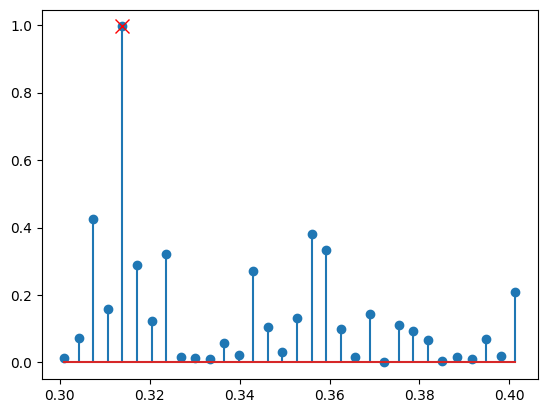

In [ ]:
plt.stem(freq[f_start:f_end], power[f_start:f_end])
plt.plot(freq[f_start + i_max], power[f_start + i_max], 'rx', markersize=10)